# **K-Means Clustering Algorithm (Unsupervice)**



**Import Data Sets**

In [ ]:
import pandas as pd
data= pd.read_csv('/DataSets/Customers.csv')

In [ ]:
# Random Rows
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
113,114,Male,19,64,46
187,188,Male,28,101,68
6,7,Female,35,18,6
127,128,Male,40,71,95
161,162,Female,29,79,83


* We use only Annual Income (k$) and Spending Score (1-100) columns

In [ ]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
94,60,42
92,60,49
153,78,76
85,54,46
33,33,92


**Column Rename**

In [ ]:
data = data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'})
data.sample(5)

,Income,Score
4,17,40
188,103,17
128,71,11
111,63,54
13,20,77


**UnderStand data set use ploat**

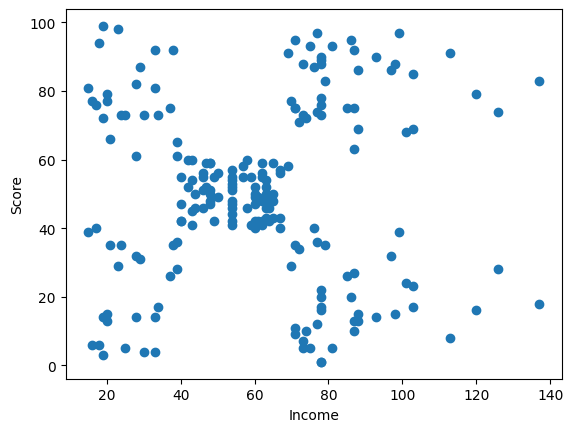

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['Income'],data['Score']) # x = Income , y = Score
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

### How to Find K value

In [ ]:
from sklearn.cluster import KMeans
# Find K value using List
k_values = [1,2,3,4,5,6,7,8,9,10]

# WCSS value store create List
wcss_error = []

# Using for loop find K value in  wcss error
for k in k_values:
  # Give one by one k vales
  model = KMeans(n_clusters=k)
  # Model Train Model
  model.fit(data[['Income','Score']])
  # append(model.inertia_) --> end of add value
  wcss_error.append(model.inertia_)

**Wcss Error List**

In [ ]:
wcss_error

[269981.28000000014,
 185930.4627192983,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 37455.98455516028,
 31969.42655023547,
 25388.76002817936,
 21797.08494464637,
 19701.35225128174]

### Use Llbo Method

**Create Plot**

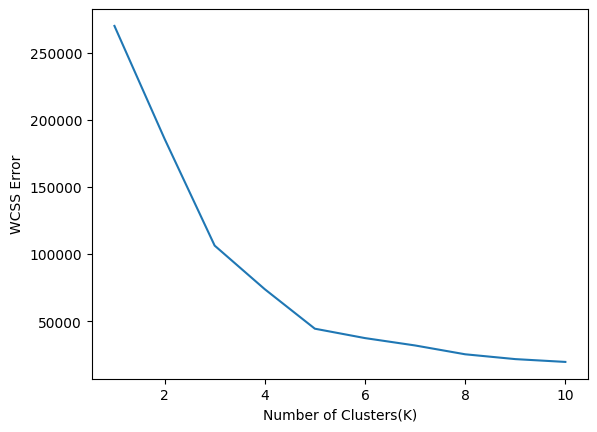

In [ ]:
# X value = k_values
# Y Values = wcss_error
plt.plot(k_values,wcss_error)
plt.xlabel('Number of Clusters(K)') # Identify the X aixo
plt.ylabel('WCSS Error') # Identify the Y aixo
plt.show()

**The graph has the highest gradient at K = 5.**

### Train Model

In [ ]:
from sklearn.cluster import KMeans
# Create model using KMeans (K = 5)
model = KMeans(n_clusters=5)
# Train and Predict values
pred = model.fit_predict(data[['Income','Score']])

* Have a class 5 (0,1,2,3,4,5)

In [ ]:
pred # Predicted Values

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
data.head() # First five rows predict

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Include custer column**

In [ ]:
data['Cluster'] = pred # pred --> Predicted values
data.head()

,Income,Score,cluster,Cluster
0,15,39,2,2
1,15,81,3,3
2,16,6,2,2
3,16,77,3,3
4,17,40,2,2


### Let's separate the clusters separately

In [ ]:
c1 = data[data['Cluster']==0]
c2 = data[data['Cluster']==1]
c3 = data[data['Cluster']==2]
c4 = data[data['Cluster']==3]
c5 = data[data['Cluster']==4]

**Draw Plots**

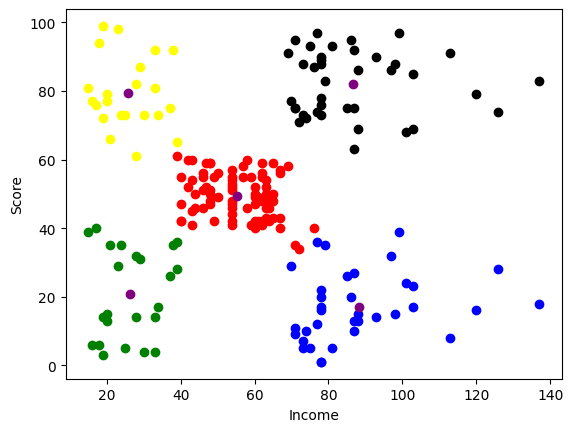

In [ ]:
plt.scatter(c1['Income'],c1['Score'],color='red')
plt.scatter(c2['Income'],c2['Score'],color='blue')
plt.scatter(c3['Income'],c3['Score'],color='green')
plt.scatter(c4['Income'],c4['Score'],color='yellow')
plt.scatter(c5['Income'],c5['Score'],color='black')

# Draw in center in Clusters
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

**Look at center in Clusters**

In [ ]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])